In [ ]:
##Load and exploration of dataset

In [38]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:\\Users\\vaibh\\Downloads\\uber.csv')

# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## Data Preprocessing

## Initial Exploration

In [39]:
# Descriptive statistics
stats = df.describe()

# Passenger count distribution
passenger_counts = df['passenger_count'].value_counts()

print(stats)
print(passenger_counts)

         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787         7.720539   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.382535e+07       6.000000        -73.992065        40.734796   
50%    2.774550e+07       8.500000        -73.981823        40.752592   
75%    4.155530e+07      12.500000        -73.967154        40.767158   
max    5.542357e+07     499.000000         57.418457      1644.421482   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      199999.000000     199999.000000    200000.000000  
mean          -72.525292         39.923890         1.684535  
std            13.117408          6.794829         1.385997  
min         -3356.666300       -881.985513         0.000000  
25%           -73.991407        

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


# Cleaning the dataset


In [41]:
df.dropna()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


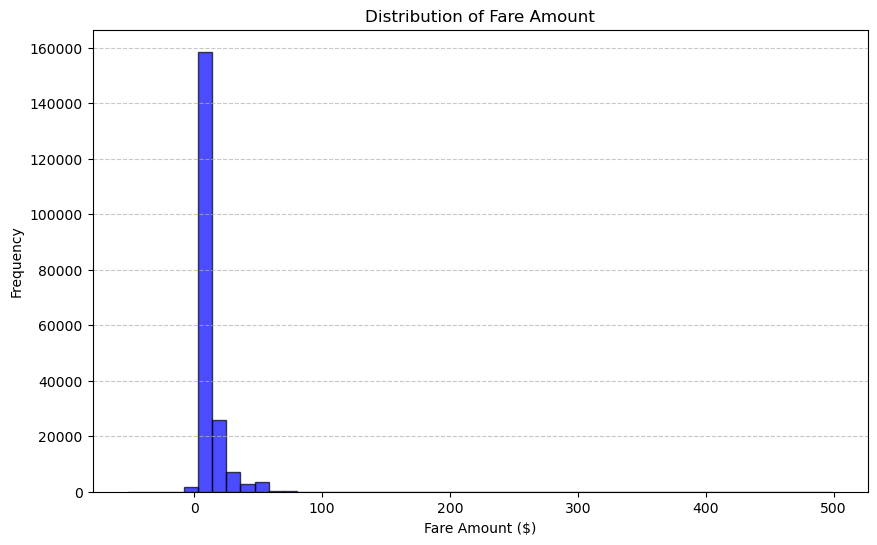

(count    200000.000000
 mean         11.359955
 std           9.901776
 min         -52.000000
 25%           6.000000
 50%           8.500000
 75%          12.500000
 max         499.000000
 Name: fare_amount, dtype: float64,
 None)

In [42]:
fare_summary = df['fare_amount'].describe()

# Visualize the distribution of fare_amount
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['fare_amount'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Output summary and visualization
fare_summary, plt.show()

In [ ]:
#Training and testing of the dataset

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X =df.drop(columns=['fare_amount'])
y = df['fare_amount']


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((160000, 8), (40000, 8), (160000,), (40000,))

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [48]:
categorical_features = ['day_of_week', 'time_of_day', 'distance_category']

In [49]:
missing_rows = df[df[['dropoff_longitude', 'dropoff_latitude']].isnull().any(axis=1)]

# Remove rows with missing values
uber_data_clean = df.dropna()

# Check if any missing values remain
remaining_missing = df.isnull().sum()

# Output the count of rows removed and the summary of missing values
num_removed = len(missing_rows)
remaining_missing, num_removed

(Unnamed: 0           0
 key                  0
 fare_amount          0
 pickup_datetime      0
 pickup_longitude     0
 pickup_latitude      0
 dropoff_longitude    1
 dropoff_latitude     1
 passenger_count      0
 dtype: int64,
 1)

In [50]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Output the number of rows in the training and testing sets
train_size = len(train_data)
test_size = len(test_data)
train_size, test_size

(160000, 40000)

In [51]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to standardize
numerical_columns = [ 'fare_amount', 'passenger_count']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization on training data
train_data_scaled = train_data.copy()
train_data_scaled[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

# Apply the scaler fitted to training data on the testing data
test_data_scaled = test_data.copy()
test_data_scaled[numerical_columns] = scaler.transform(test_data[numerical_columns])

# Verify the transformation
train_data_scaled.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
153248,17778666,2009-11-19 21:59:00.00000086,0.076404,2009-11-19 21:59:00 UTC,-73.978585,40.748388,-73.976913,40.784958,-0.487299
67802,54334677,2013-02-27 22:29:15.0000004,2.158739,2013-02-27 22:29:15 UTC,-73.978198,40.752533,-73.909752,40.874372,-0.487299
148889,11815656,2014-06-01 08:48:00.00000094,-0.546255,2014-06-01 08:48:00 UTC,-73.994242,40.751227,-73.999432,40.762037,-0.487299
103093,28734805,2010-07-10 23:10:00.00000019,0.403045,2010-07-10 23:10:00 UTC,-73.951705,40.778330,-73.956050,40.777560,0.224099
104681,54482655,2013-09-29 13:36:00.000000167,4.149206,2013-09-29 13:36:00 UTC,-73.989120,40.736932,-73.782890,40.643947,-0.487299


In [ ]:
#correlation matrix

In [52]:
relevant_columns = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 
                    'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

# Calculating the correlation matrix
correlation_matrix = df[relevant_columns].corr()

# Extracting the correlation with fare_amount
fare_correlation = correlation_matrix['fare_amount'].sort_values(ascending=False)
fare_correlation

fare_amount          1.000000
pickup_longitude     0.010457
passenger_count      0.010150
dropoff_longitude    0.008986
pickup_latitude     -0.008481
dropoff_latitude    -0.011014
Name: fare_amount, dtype: float64

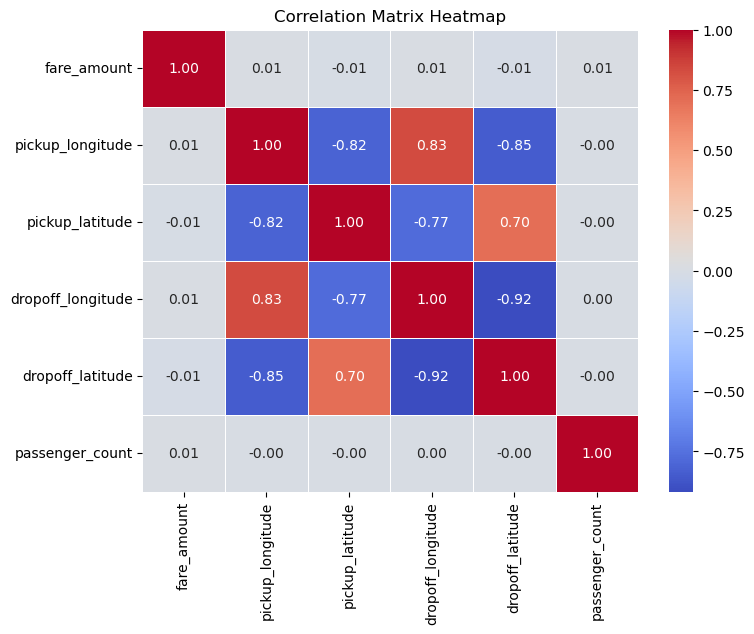

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()